<a href="https://colab.research.google.com/github/Bhupendra-glitch/Experimentation-Uplift-Modeling/blob/main/Experimentation_Uplift_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Intro**


# Import liberies

**Quick View**

In [4]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed = 47

In [19]:
pdf_train = pd.read_csv('/content/pdf (1).csv')
pdf = pdf_train.copy()
pdf.shape

(687029, 196)

In [20]:
pdf.head()

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m
0,16095858,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,6.0,...,3141.25,356.67,237.25,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008
1,15906620,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,113.39,62.69,58.71,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000
2,16495466,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,14.0,...,1239.19,533.46,83.37,593.13,1217.43,1336.83,3709.82,0.0000,NaN,0.0803
3,16570217,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,8.0,...,139.68,1849.91,360.40,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000
4,16346871,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,...,226.98,168.05,461.37,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495


In [22]:
pdf.describe()

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m
count,6.870290e+05,675264.000000,687029.000000,687029.000000,687029.000000,687029.000000,687029.000000,687029.000000,687029.000000,687029.000000,...,683914.000000,683914.000000,683914.000000,683914.000000,683914.000000,683914.000000,683914.000000,610075.000000,546576.00000,546661.000000
mean,1.613922e+07,43.740718,2.567841,3.523936,5.702353,2.913084,5.370441,4.766505,2.215738,5.508804,...,738.580018,218.296431,340.566110,338.279236,790.497073,431.775305,400.094652,0.291046,0.06995,0.112960
std,2.865510e+05,14.842062,5.405423,6.919543,11.000989,5.999545,9.447374,8.244424,4.168154,9.033987,...,2105.583811,523.454723,865.868461,919.501039,1864.715986,986.999892,911.842583,0.909622,0.12657,0.142271
min,1.564313e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.589113e+07,32.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.613905e+07,42.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,...,219.700000,62.000000,76.390000,0.000000,219.990000,138.990000,132.690000,0.000000,0.00000,0.000000
75%,1.638741e+07,56.000000,3.000000,4.000000,6.000000,3.000000,6.000000,6.000000,3.000000,7.000000,...,775.120000,230.520000,353.067500,310.580000,833.785000,502.820000,436.590000,0.000000,0.10150,0.225700
max,1.663567e+07,100.000000,1556.000000,1763.000000,2666.000000,1151.000000,2199.000000,2046.000000,964.000000,1819.000000,...,505188.120000,177758.220000,283892.600000,208722.300000,561862.500000,232231.450000,235498.160000,9.192400,0.70550,0.706600




*   There are 196 colum in teh dataset
*   The target variable is 'Response_att'- we have to predict whether the clien will respond to the market mailing.
*   Audiance is divived into 2 samples - Test and Control.
*  the dataset gives us basic information about the client like -  his age, number of child, etc.
* There is also a lot of information about some groups of goods (it's necessary for searching insights) and a lot of statistical information for example the coefficients of variation of discounts or prices


**There are also few categories columns: gender and group. we trasfer them into binary feature. **

In [23]:
gender_map = {'X' : 0, 'M' : 1}
group_map = {'test' : 0, 'control' : 1}
pdf['gender'] = pdf['gender'].map(gender_map)
pdf['group'] = pdf['group'].map(group_map)

**Missing values**

In [24]:
print('Number NA:', pdf.isna().sum().sum())
print('Amount of all values:', pdf.shape[0]*pdf.shape[1])
print('Missed Data Percentage:', round(100*pdf.isna().sum().sum()/(pdf.shape[0]*pdf.shape[1]), 2), '%')

Number NA: 26317914
Amount of all values: 134657684
Missed Data Percentage: 19.54 %


In [25]:
#missing data
total = pdf.isnull().sum().sort_values(ascending=False)
percent = (pdf.isnull().sum()/pdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
gender,687029,1.000000
k_var_sku_price_15d_g49,496259,0.722326
k_var_disc_share_15d_g49,496159,0.722181
k_var_count_per_cheque_15d_g34,468551,0.681996
k_var_sku_price_15d_g34,468551,0.681996
k_var_disc_share_15d_g34,468467,0.681874
k_var_count_per_cheque_15d_g24,442121,0.643526
k_var_disc_share_15d_g24,442054,0.643428
k_var_sku_price_1m_g49,414473,0.603283
k_var_count_per_cheque_1m_g49,414473,0.603283


In [ ]:
pdf = pdf.fillna(np.nan)
pdf_col_list = list(pdf.columns)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
pdf = pd.DataFrame(imputer.fit_transform(pdf), columns=pdf_col_list)

print('Number NA:', pdf.isna().sum().sum())

In [ ]:
#dealing with missing data
pdf = pdf.fillna(np.nan)
pdf_col_list = list(pdf.columns)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
pdf = pd.DataFrame(imputer.fit_transform(pdf), columns=pdf_col_list)

print('Number NA:', pdf.isna().sum().sum())

**Outliers**

Outliers can markedly affect on our models and can be a valuable soruce of information providing us insight about specific behaviours.

In [28]:
# Group number is in range from 20 to 79
all_groups = [i for i in range(20, 80)]
pdf_outliers = pdf.copy()

# This function returns columns from 'columns' list, which are met in columns of "data"
def get_columns_list(data, columns):
    return data.columns[data.columns.isin(columns)]

We will collect the features that interest us: some are already in the dataset, some will have to be collected separately. These features describe the data in general way but for a fact-finding analysis this is enough.

In [29]:
collect_features = {
    'cheque_count_12m_max'             : (get_columns_list(pdf_outliers, ['cheque_count_12m_g{}'.format(i) for i in all_groups]), 'sum'),
    'children'                         : (['children'], 'max'),
    'crazy_purchases_cheque_count_12m' : (['crazy_purchases_cheque_count_12m'], 'max'),
    'k_var_disc_share_6m_max'          : (get_columns_list(pdf_outliers, ['k_var_disc_share_6m_g{}'.format(i) for i in all_groups]), 'max'),
    'k_var_sku_price_6m_max'           : (get_columns_list(pdf_outliers, ['k_var_sku_price_6m_g{}'.format(i) for i in all_groups]), 'max'),
    'sale_sum_12m_sum'                  : (get_columns_list(pdf_outliers, ['sale_sum_6m_g{}'.format(i) for i in all_groups]), 'sum'),
}

In [30]:
for key in collect_features.keys():
    method = collect_features[key][1]

    if method == 'max':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].max(axis=1)
    elif method == 'sum':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].sum(axis=1)
    elif method == 'max':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].max(axis=1)
    elif method == 'min':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].min(axis=1)

According to the collected features, we look at the outliers, which are determined by the proportions relative to the IQR. We will divide the obtained records into records from the test and control groups and divide them by participation in our chosen action. Let's look at the results.

Column cheque_count_12m_max
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0    432047  440669    446363  450331
1     test_1     41853   45024     47506   49516
2  control_0    144816  147624    149541  150787
3  control_1     12905   13940     14704   15318


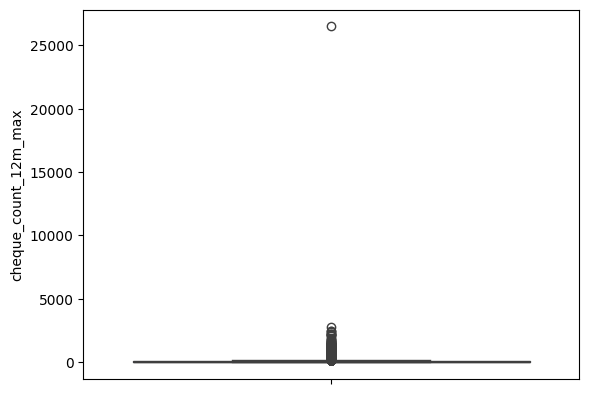

Column children
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0    436922  453304    453304  453650
1     test_1     53728   55595     55595   55639
2  control_0    146257  151684    151684  151811
3  control_1     16604   17185     17185   17198


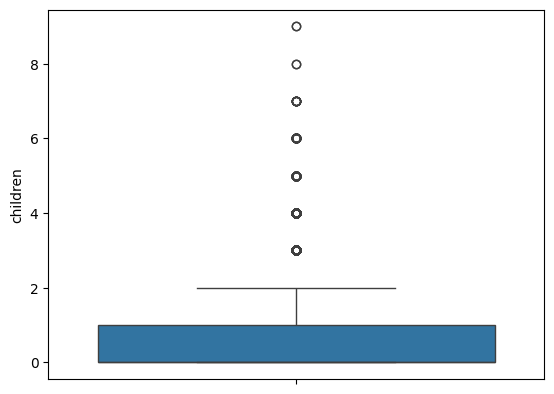

Column crazy_purchases_cheque_count_12m
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0    428149  438737    442364  447457
1     test_1     43475   46811     48116   50164
2  control_0    143750  147196    148333  149976
3  control_1     13620   14654     15050   15635


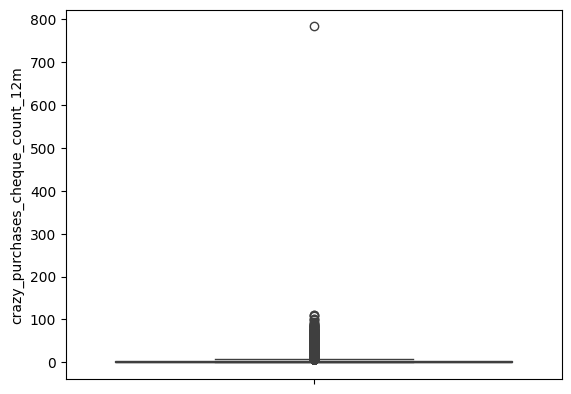

Column k_var_disc_share_6m_max
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0    455755  455989    456137  456205
1     test_1     56391   56477     56552   56603
2  control_0    152503  152582    152618  152653
3  control_1     17423   17457     17480   17493


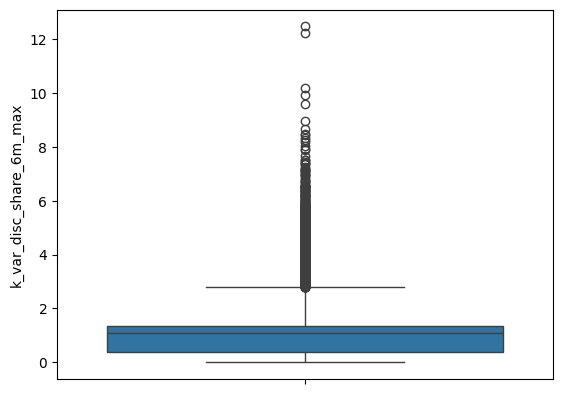

Column k_var_sku_price_6m_max
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0    455562  456428    456621  456666
1     test_1     56138   56613     56732   56763
2  control_0    152395  152719    152785  152802
3  control_1     17356   17487     17523   17535


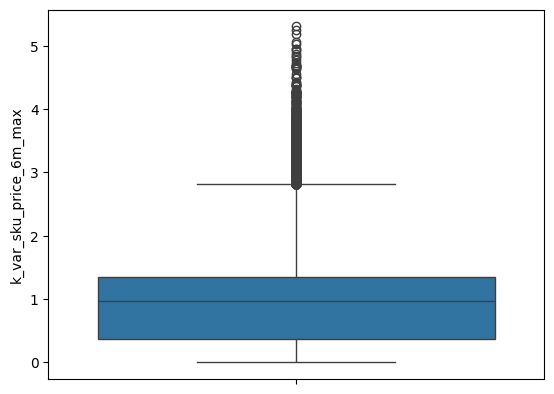

Column sale_sum_12m_sum
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0    426160  434636    440692  444971
1     test_1     41194   44137     46519   48334
2  control_0    142905  145788    147717  149069
3  control_1     12724   13618     14312   14889


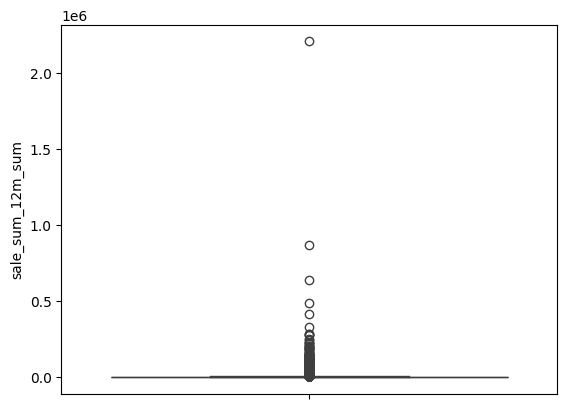

In [31]:
for key in collect_features.keys():
    print('Column', key)

    dataframe = {'Type' : ['test_0', 'test_1', 'control_0', 'control_1']}
    for whis in [1.5, 2, 2.5, 3]:
        IQR = pdf_outliers[key].quantile(0.75) - pdf_outliers[key].quantile(0.25)
        sample = pdf_outliers[pdf_outliers[key] <= pdf_outliers[key].quantile(0.75) + IQR * whis]
        sample_test = sample[sample['group'] == 0]['response_att'].value_counts()
        sample_control = sample[sample['group'] == 1]['response_att'].value_counts()

        dataframe['whis {}'.format(whis)] = [sample_test[0], sample_test[1], sample_control[0], sample_control[1]]

    print(pd.DataFrame(dataframe))
    sns.boxplot(pdf_outliers[key])
    plt.show()

<Axes: >

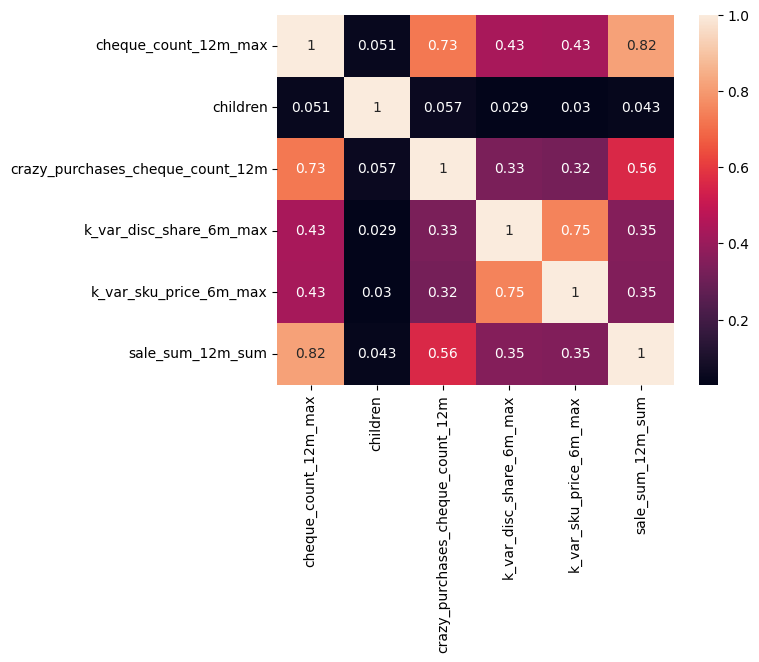

In [32]:
sns.heatmap(pdf_outliers[[key for key in collect_features.keys()]].corr(), annot=True)

In [34]:
def get_redundant_pairs(df):
  '''Get diagonal and lower trigangle pairs of correlation matrix'''
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0, df.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop

def get_top_abs_correlation(df, a, b):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
  return au_corr[a:b]

print("Top Absolute Correlations")
print(get_top_abs_correlation(pdf, 0, 10))


Top Absolute Correlations
mean_discount_depth_15d          promo_share_15d                 0.981232
k_var_cheque_category_width_15d  k_var_cheque_group_width_15d    0.972830
                                 k_var_sku_per_cheque_15d        0.969805
sale_count_3m_g33                sale_sum_3m_g33                 0.946748
sale_count_6m_g33                sale_sum_6m_g33                 0.946408
sale_count_12m_g54               sale_sum_12m_g54                0.945453
k_var_cheque_group_width_15d     k_var_sku_per_cheque_15d        0.942527
sale_count_6m_g54                sale_sum_6m_g54                 0.942166
sale_sum_12m_g24                 sale_sum_6m_g24                 0.941466
k_var_discount_depth_15d         stdev_discount_depth_15d        0.940901
dtype: float64


In [35]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, a, b):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[a:b]

print("Top Absolute Correlations")
print(get_top_abs_correlations(pdf, 0, 10))

Top Absolute Correlations
mean_discount_depth_15d          promo_share_15d                 0.981232
k_var_cheque_category_width_15d  k_var_cheque_group_width_15d    0.972830
                                 k_var_sku_per_cheque_15d        0.969805
sale_count_3m_g33                sale_sum_3m_g33                 0.946748
sale_count_6m_g33                sale_sum_6m_g33                 0.946408
sale_count_12m_g54               sale_sum_12m_g54                0.945453
k_var_cheque_group_width_15d     k_var_sku_per_cheque_15d        0.942527
sale_count_6m_g54                sale_sum_6m_g54                 0.942166
sale_sum_12m_g24                 sale_sum_6m_g24                 0.941466
k_var_discount_depth_15d         stdev_discount_depth_15d        0.940901
dtype: float64


**Test vs Control**

<Axes: xlabel='group', ylabel='count'>

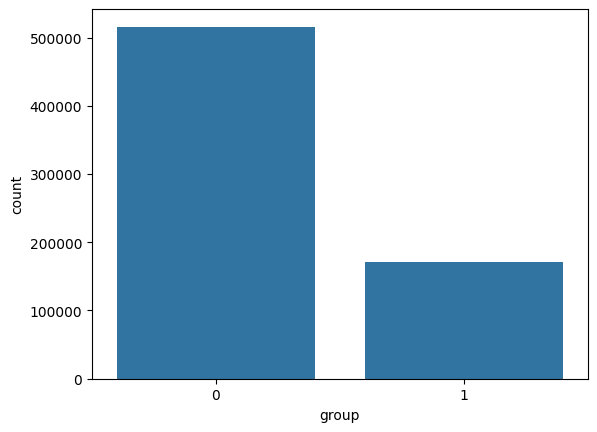

In [36]:
sns.countplot(x="group", data=pdf)


/tmp/ipython-input-861617508.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['response_sms'], label='test')
/tmp/ipython-input-861617508.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control['response_sms'], label='control')


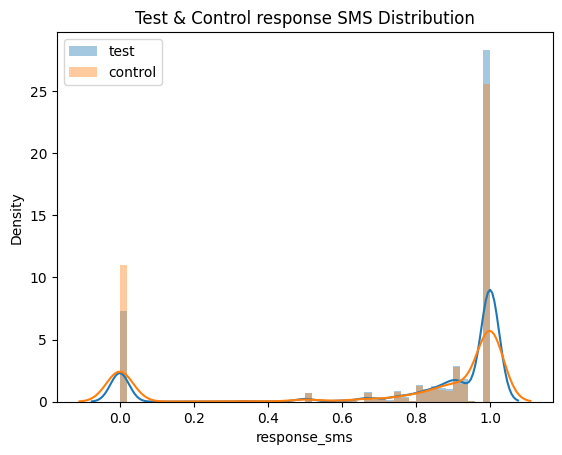

In [38]:
test = pdf[pdf['group'] == 0]

control = pdf[pdf['group'] == 1]

sns.distplot(test['response_sms'], label='test')
sns.distplot(control['response_sms'], label='control')
plt.title('Test & Control response SMS Distribution')
plt.legend()
plt.show()

If curves overlap → GOOD experiment ✔

If curves very different → selection bias X

/tmp/ipython-input-845648084.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['age'], label='test')
/tmp/ipython-input-845648084.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control['age'], label='control')


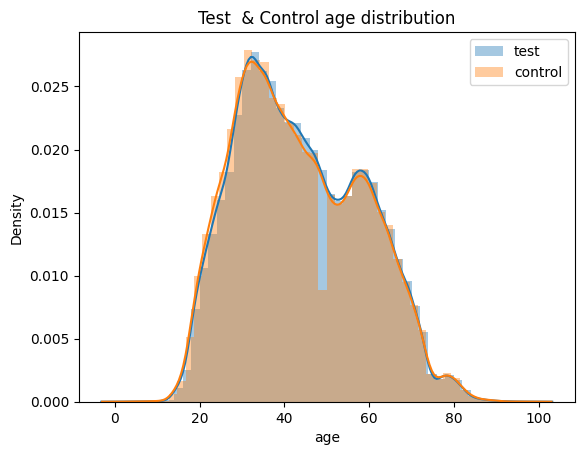

In [39]:
test  = pdf[pdf['group'] == 0]
control = pdf[pdf['group'] == 1]

sns.distplot(test['age'], label='test')
sns.distplot(control['age'], label='control')
plt.title('Test  & Control age distribution')

plt.legend()
plt.show()

**Comparsio on some feature**

We will divide customers into 2 classes depending on whether they participate in the promotion.

In [44]:
# Test participants who didn't take part in event
stubborn_test = pdf[pdf['group'] == 0]
stubborn_test  = stubborn_test[stubborn_test['response_att'] == 0]

# test partici[pants who took part in event
active_test = pdf[pdf['group'] == 0]
active_test = active_test[active_test['response_att'] == 1]


In [45]:
# Control participants who didn't take part in event
stubborn_control = pdf[pdf['group'] == 1]
stubborn_control = stubborn_control[stubborn_control['response_att'] == 0]

# Control participants who took part in event
active_control = pdf[pdf['group'] == 1]
active_control = active_control[active_control['response_att'] == 1]

In [1]:
sales_sum = ['sale_sum_3m_g{}'.format(i) for i in [24, 26, 32, 33]]

f, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(x=active_test[sales_sum].sum(axis=1), y=active_test['response_sms'], ax=axs[0, 0])
sns.distplot(active_test['response_sms'], ax=axs[0, 1])
axs[0, 1].set_ylabel('Test group')

sns.scatterplot(x=active_control[sales_sum].sum(axis=1), y=active_control['response_sms'], ax=axs[1, 0])
sns.distplot(active_control['response_sms'], ax=axs[1, 1])
axs[1, 1].set_ylabel('Control group')

NameError: name 'plt' is not defined

In [2]:
sales_sum = ['sale_sum_3m_g{}'.format(i) for i in [24, 26, 32, 33]]

f, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(stubborn_test[sales_sum].sum(axis=1), stubborn_test['response_sms'], ax=axs[0, 0])
sns.distplot(stubborn_test['response_sms'], ax=axs[0, 1])
axs[0, 1].set_ylabel('Test group')

sns.scatterplot(stubborn_control[sales_sum].sum(axis=1), stubborn_control['response_sms'], ax=axs[1, 0])
sns.distplot(stubborn_control['response_sms'], ax=axs[1, 1])
axs[1, 1].set_ylabel('Control group')

NameError: name 'plt' is not defined

In [5]:
sns.barplot(x = 'group', y='response_att', data=pdf)


NameError: name 'pdf' is not defined